# Exploratory Data Analysis

### Import Data
- Import the required packages for... Data handling, Splitting data, Evaluating models, Logistic regression
- Read in the CSV and view the dataframe
- Look at the first 5 rows of the dataframe to confirm that the csv file was read into python correctly as a dataframe

In [6]:
# data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from scipy.stats import boxcox
from scipy import stats

# `logistic regression` model
from sklearn.linear_model import LogisticRegression

In [7]:
data = pd.read_csv('online_shoppers_intention.csv')

In [8]:
# have a look at the first 5 rows
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## __Descriptive Statistics:__

#### __Shape:__
- The dataframe has 12330 rows and 18 columns

In [9]:
data.shape

(12330, 18)

#### __Describe:__
- Each column has 12330 values, meaning there is no missing value in any of the columns
- Min shows the smallest value in the column:
    - The first 10 columns have a minimum value of 0
    - The last 4 columns (OperatingSystems, Browser, Region, & TrafficType) have a minimum value of 1.
- Max shows the largest value in the column:
    - The maximum values vary column to column.
    - The highest max value is 63973.5 in the column ProductRelated_Duration
    - The lowest max value is 0.2 for both ExitRates & BounceRates
- These max and min's prove that the columns have varied ranges of values in each column. 
- Having all min values of 0 is something to look further into. Some possible questions to look into are if the zero's are in place for NaN's and if some zeros should be eliminated.

In [10]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### __Median:__
- There are 6 columns with a median of 0, meaning at least half the values are 0:
    - Informational, Informational_Duration, PageValues, SpecialDays, Weekend, Revenue
- The largest median by far is 598.94 in ProductRelated_Duration, followed by ProductRelated having a median of 18. 
- The rest of the columns have median values between 0 and 7.5

In [11]:
data.median()

Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    598.936905
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

#### __More Info:__
- There is no missing data in the dataset, all the columns have 12330 values
- The datatype of the columns vary:
    - int64: 7 columns
    - float64: 7 columns
    - object: 2 columns
    - bool: 2 columns
- There are 18 columns

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

#### __Create Seperate DataFrames:__
- Create a dataframe with the categorical values and a dataframe with the continuous values
- This will help with analyzing the data

In [13]:
data_cat = data.drop(['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','Revenue'], axis=1)

In [14]:
data_cont = data.drop(['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue','SpecialDay'], axis=1)

In [15]:
target_values = data.drop(['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','SpecialDay','Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues'], axis=1)

## __Visualizations:__

### *Continuous Data:*

#### __Histogram:__
- Histograms help to visualize the skewness and range of values
- Seen below are histograms of all the columns in the continuous values dataframe
- As seen in these histograms, the majority of the columns contain mainly low values & are skewed
- One histogram that stands out is ExitRates: it has more vaired data, and has a high near 0, followed by a decrease, and another increase towards the end at .20. 

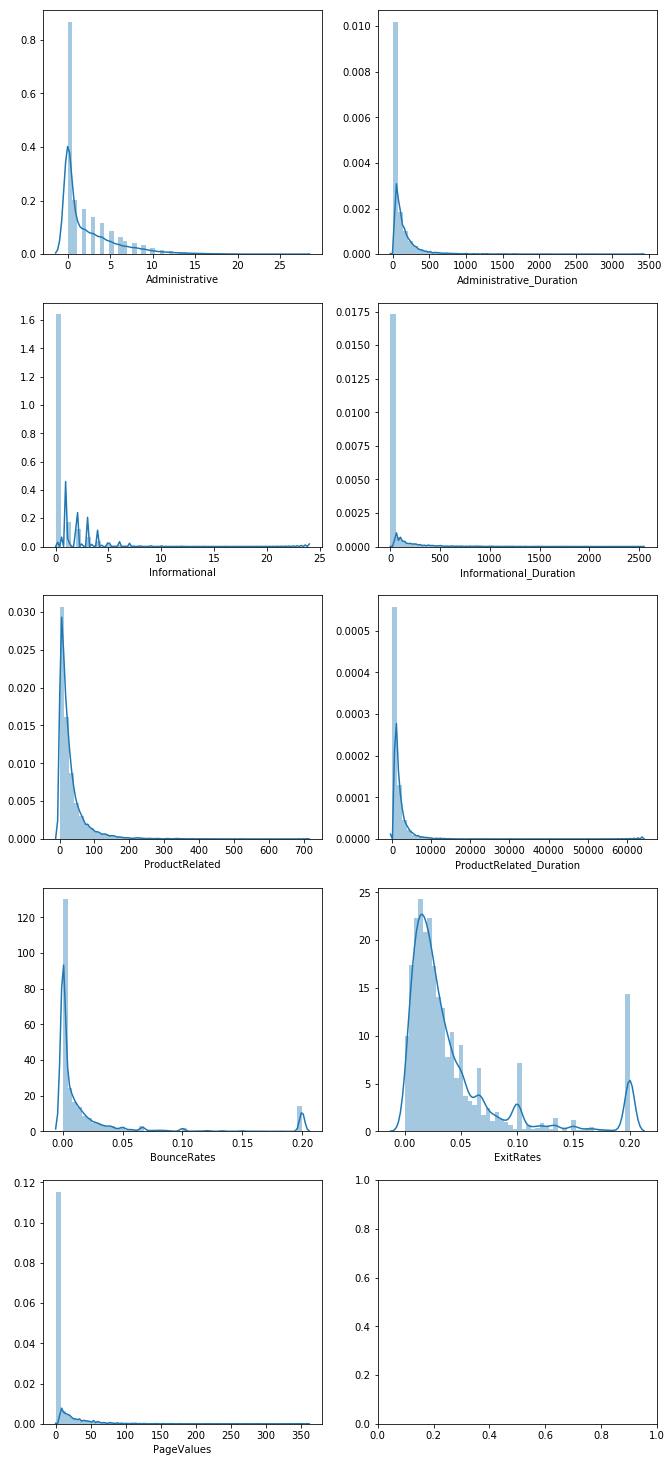

In [16]:
f, axes = plt.subplots(5, 2, figsize=(11,26), sharex=False)
sns.distplot(data_cont["Administrative"] , ax=axes[0, 0])
sns.distplot(data_cont["Administrative_Duration"] , ax=axes[0, 1])
sns.distplot(data_cont["Informational"] , ax=axes[1, 0])
sns.distplot(data_cont["Informational_Duration"] , ax=axes[1, 1])
sns.distplot(data_cont["ProductRelated"] , ax=axes[2, 0])
sns.distplot(data_cont["ProductRelated_Duration"] , ax=axes[2, 1])
sns.distplot(data_cont["BounceRates"] , ax=axes[3, 0])
sns.distplot(data_cont["ExitRates"] , ax=axes[3, 1])
sns.distplot(data_cont["PageValues"] , ax=axes[4, 0])
plt.show()

#### __Skewness:__
- Calculate the skewness of the data
- The highest skewness is seen in Informational_Duration, 7.579
- The lowest skewness is seen in Administrative, 1.960
- Skewness should be in the range of -.5 and .5. All of these results are out of this range, they are all above 1.9.

In [17]:
data_cont.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
dtype: float64

#### __Box Plots:__
- Box plots visualizes if there are any outliers in the data, which can alter the results
- Box plots also visualize the range of the values in the data
- As seen in the following boxplot containing all the variables, it is clear that ProductRelated_Duration is altering the results due to its range of values from 0 to over 60,000, while the other variables values are all below 10,000.
- By seperating the variables into smaller sections, it will be easier to see the number of outliers
- Since all of the variables minimum values are 0, all the outliers are seen in the larger values
- The green triangle represents the mean

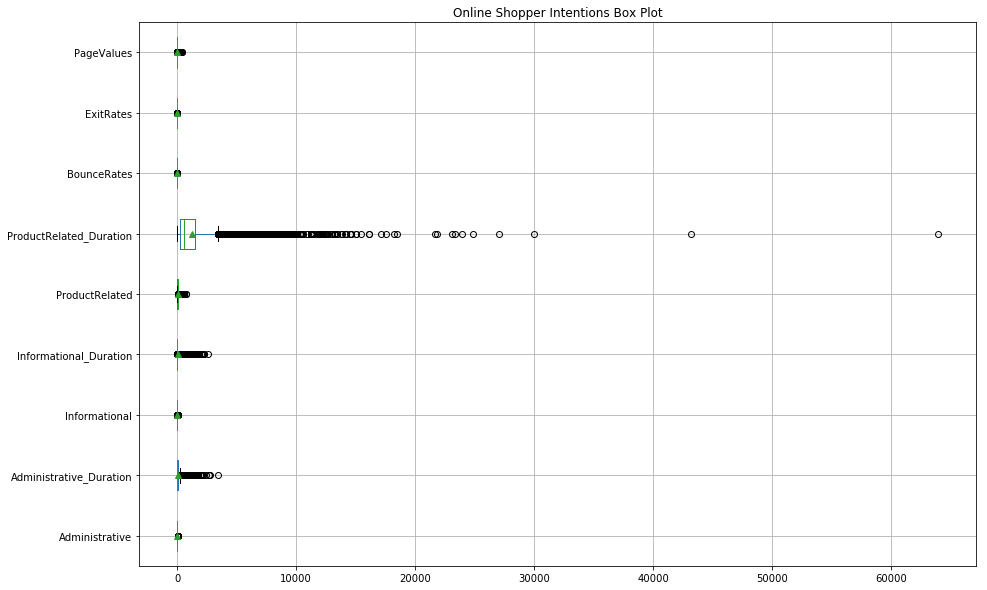

In [18]:
data_cont.boxplot(vert=False, figsize=(15,10),showmeans=True)
plt.title('Online Shopper Intentions Box Plot')
plt.show()

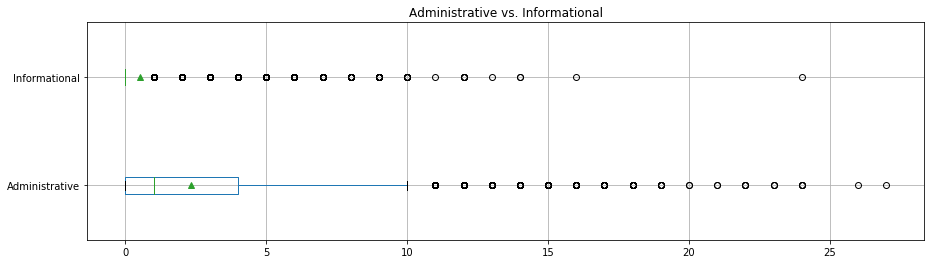

In [19]:
data_cont.boxplot(column=['Administrative','Informational'],vert=False, figsize=(15,4),showmeans=True)
plt.title('Administrative vs. Informational')
plt.show()

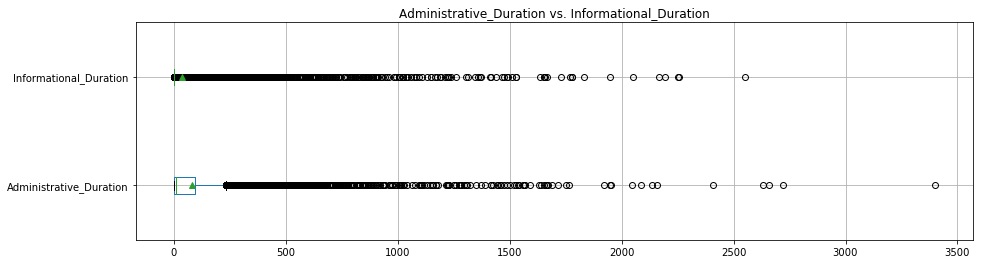

In [20]:
data_cont.boxplot(column=['Administrative_Duration','Informational_Duration'],vert=False, figsize=(15,4),showmeans=True)
plt.title('Administrative_Duration vs. Informational_Duration')
plt.show()

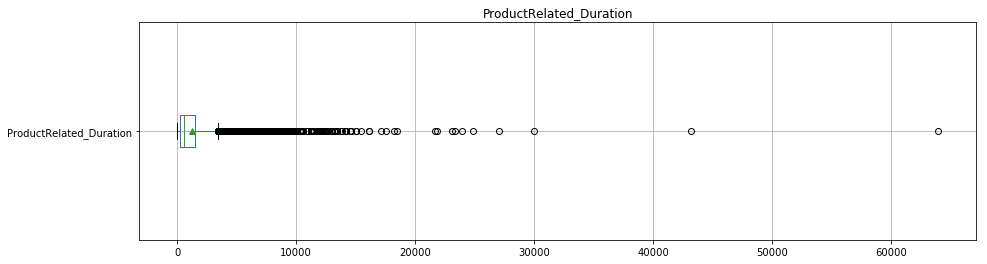

In [21]:
data_cont.boxplot(column=['ProductRelated_Duration'],vert=False, figsize=(15,4),showmeans=True)
plt.title('ProductRelated_Duration')
plt.show()

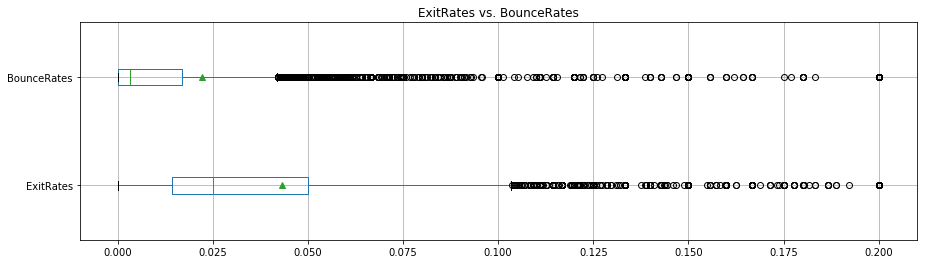

In [22]:
data_cont.boxplot(column=['ExitRates','BounceRates'],vert=False, figsize=(15,4),showmeans=True)
plt.title('ExitRates vs. BounceRates')
plt.show()

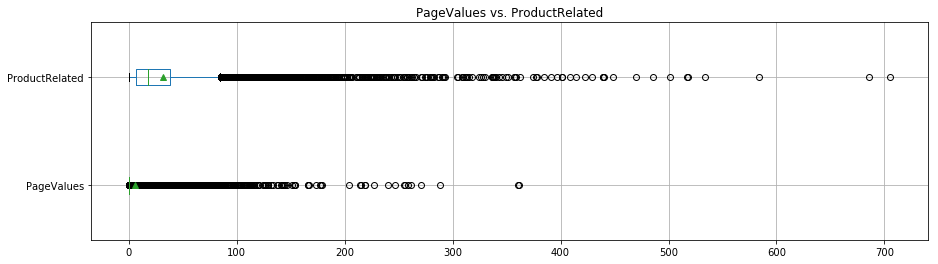

In [23]:
data_cont.boxplot(column=['PageValues','ProductRelated'],vert=False, figsize=(15,4),showmeans=True)
plt.title('PageValues vs. ProductRelated')
plt.show()

### *Categorical Data:*

#### __Bar Graphs:__
- Bar graphs visualize categorical data through the distribution of bins
- Each categorical value is shown in a seperate bar graph below

__*SpecialDay:*__
- Largest bin by far is 0.0
- Smallest bins are 0.2 and 1.0

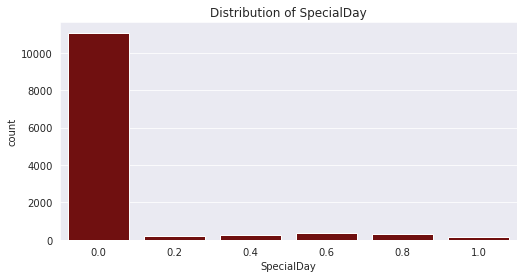

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="SpecialDay", data=data_cat, color="maroon")
ax.set(title="Distribution of SpecialDay")
plt.show()

__*Months:*__
- Top 4 largest bins are May, November, March & December
- Smallest bin is Febaruary
- Missing January and April

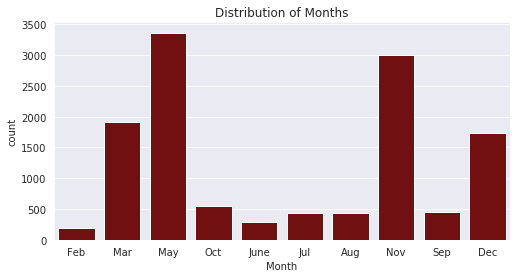

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Month", data=data_cat, color="maroon")
ax.set(title="Distribution of Months")
plt.show()

*__OperatingSystems:__*
- Largest bin is 2
- Smallest bins are barely visable: 5, 6 & 7
- 1 & 3 look to have the same counts

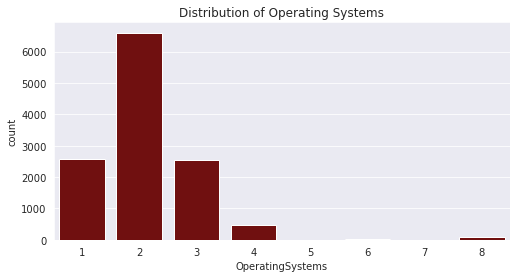

In [26]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="OperatingSystems", data=data_cat, color="maroon")
ax.set(title="Distribution of Operating Systems")
plt.show()

*__Browser:__*
- Largest bin is 2
- Smallest bins are barely visable: 7, 9, 11 & 12
- 1 is the next largest bin, followed by 4 and 5 with visiably much lower counts

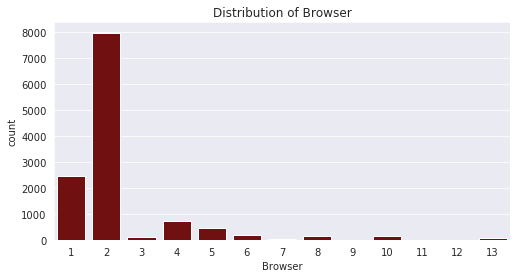

In [27]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Browser", data=data_cat, color="maroon")
ax.set(title="Distribution of Browser")
plt.show()

*__Region:__*
- Largest bin is 1
- Smallest bins are 5, 8 & 9
- 3 is the next largest bin with around half the count of 1, followed by 4 and 2

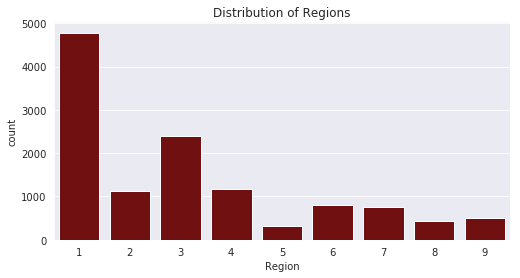

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Region", data=data_cat, color="maroon")
ax.set(title="Distribution of Regions")
plt.show()

*__TrafficType:__*
- Largest bin is 2
- Smallest bins are barely visible: 12, 14, 16, 17, 18 & 19
- 1 is the next largest bin, followed by 4 and 4.
- Majority of the data is seen in bins 1, 2, 3 & 4

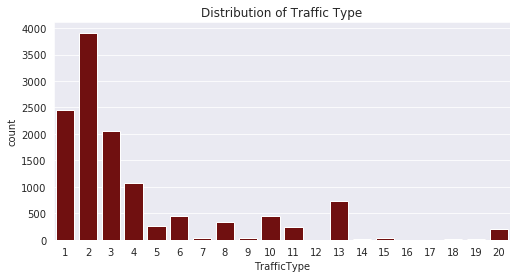

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="TrafficType", data=data_cat, color="maroon")
ax.set(title="Distribution of Traffic Type")
plt.show()

*__VisitorType:__*
- Visitor Type is made up of 3 bins: Returning_Visitor, New_Visitor & Other
- Largest bin is Returning_Visitor
- Smallest bin is Other
- Returning_Visitor makes up over 10,000 counts of the variable, while New_Visitor is under 2,000

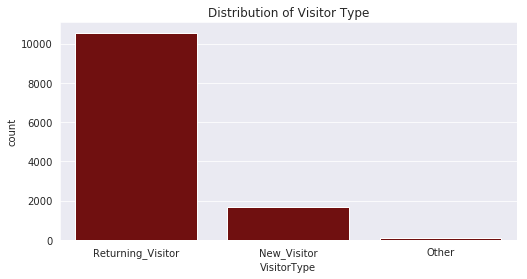

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="VisitorType", data=data_cat, color="maroon")
ax.set(title="Distribution of Visitor Type")
plt.show()

*__Weekend:__*
- Weekend is a True & False valued variable
- False is much larger than True
- False has a count of over 8,000 & True has a count of under 4,000
- Observation: the week is 5 days, while the weekend is only 2 days

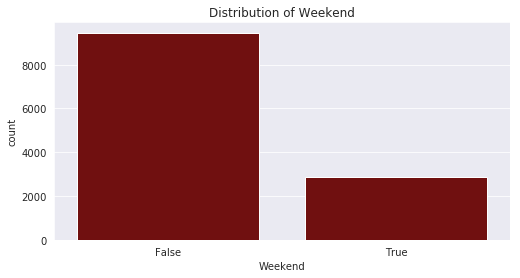

In [31]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Weekend", data=data_cat, color="maroon")
ax.set(title="Distribution of Weekend")
plt.show()

*__Revenue:__*
- Revenue is a True & False valued variable
- False is much larger than True
- False has a count of over 10,000 & True has a count of almost 2,000

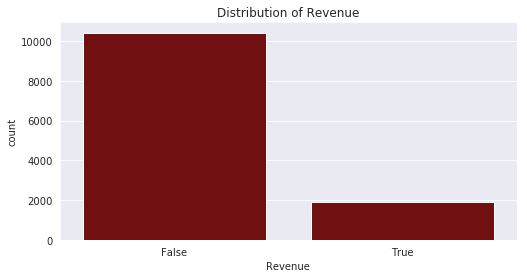

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="Revenue", data=target_values, color="maroon")
ax.set(title="Distribution of Revenue")
plt.show()

## __Binning:__

- As seen above, January and April are not seen in the dataset under Month. To create a better understanding of the month data, the months were binned.
- Bin the months into seasons using the following values:

| Value | Season | 
| ------------ | ---------- | 
| 1 | Winter ('Dec', 'Jan', 'Feb') |
| 2 | Spring ('Mar', 'Apr', 'May') |
| 3 | Summer ('Jun', 'Jul', 'Aug') |
| 4 | Fall ('Sep', 'Oct', 'Nov') |

In [33]:
def assign_season_bins(Month):
     if Month == 'Dec':                          
        return('1')
     if Month == 'Jan':                          
        return('1')
     if Month == 'Feb':                          
        return('1')
     if Month == 'Mar':                          
        return('2')
     if Month == 'Apr':                         
        return('2')
     if Month == 'May':                          
        return('2')
     if Month == 'June':                          
        return('3')
     if Month == 'Jul':                          
        return('3')
     if Month == 'Aug':                          
        return('3')
     if Month == 'Sep':                          
        return('4')
     if Month == 'Oct':                          
        return('4')
     if Month == 'Nov':                          
        return('4')

# Create a new column SeasonBins in the dataframe

data_cat['SeasonBins'] = data_cat['Month'].apply(assign_season_bins)

data_cat.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,SeasonBins
0,0.0,Feb,1,1,1,1,Returning_Visitor,False,1
1,0.0,Feb,2,2,1,2,Returning_Visitor,False,1
2,0.0,Feb,4,1,9,3,Returning_Visitor,False,1
3,0.0,Feb,3,2,2,4,Returning_Visitor,False,1
4,0.0,Feb,3,3,1,4,Returning_Visitor,True,1


In [34]:
data_cat = data_cat.drop(['Month'], axis=1)
data_cat.head()

,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,SeasonBins
0,0.0,1,1,1,1,Returning_Visitor,False,1
1,0.0,2,2,1,2,Returning_Visitor,False,1
2,0.0,4,1,9,3,Returning_Visitor,False,1
3,0.0,3,2,2,4,Returning_Visitor,False,1
4,0.0,3,3,1,4,Returning_Visitor,True,1


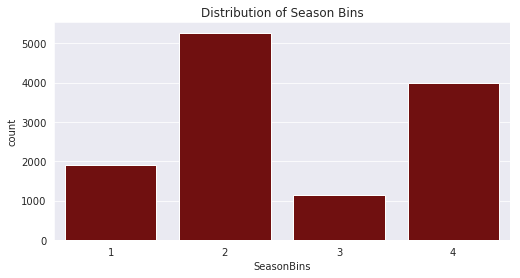

In [35]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x="SeasonBins", data=data_cat, color="maroon")
ax.set(title="Distribution of Season Bins")
plt.show()

- This tells us that the Spring had the most visits throughout the year, followed by the Fall, Winter, and then Summer with by far the least.

## __Encoding__

Create a binary column for each category

http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

In [36]:
data_cat_enc = pd.concat([data_cat,pd.get_dummies(data_cat['SpecialDay'], prefix='SpecialDay')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(data_cat['OperatingSystems'], prefix='OperatingSystems')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(data_cat['Browser'], prefix='Browser')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(data_cat['Region'], prefix='Region')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(data_cat['TrafficType'], prefix='TrafficType')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(data_cat['VisitorType'], prefix='VisitorType')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(data_cat['Weekend'], prefix='Weekend')],axis=1)
data_cat_enc = pd.concat([data_cat_enc,pd.get_dummies(data_cat['SeasonBins'], prefix='SeasonBins')],axis=1)
data_cat_enc.head()

,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,SeasonBins,SpecialDay_0.0,SpecialDay_0.2,...,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,SeasonBins_1,SeasonBins_2,SeasonBins_3,SeasonBins_4
0,0.0,1,1,1,1,Returning_Visitor,False,1,1,0,...,0,0,0,1,1,0,1,0,0,0
1,0.0,2,2,1,2,Returning_Visitor,False,1,1,0,...,0,0,0,1,1,0,1,0,0,0
2,0.0,4,1,9,3,Returning_Visitor,False,1,1,0,...,0,0,0,1,1,0,1,0,0,0
3,0.0,3,2,2,4,Returning_Visitor,False,1,1,0,...,0,0,0,1,1,0,1,0,0,0
4,0.0,3,3,1,4,Returning_Visitor,True,1,1,0,...,0,0,0,1,0,1,1,0,0,0


In [37]:
data_cat_enc.drop(['SpecialDay'],axis=1, inplace=True)
data_cat_enc.drop(['OperatingSystems'],axis=1, inplace=True)
data_cat_enc.drop(['Browser'],axis=1, inplace=True)
data_cat_enc.drop(['Region'],axis=1, inplace=True)
data_cat_enc.drop(['TrafficType'],axis=1, inplace=True)
data_cat_enc.drop(['VisitorType'],axis=1, inplace=True)
data_cat_enc.drop(['Weekend'],axis=1, inplace=True)
data_cat_enc.drop(['SeasonBins'],axis=1, inplace=True)
data_cat_enc.head()

,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,...,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,SeasonBins_1,SeasonBins_2,SeasonBins_3,SeasonBins_4
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0


In [38]:
data_cat_enc.columns

Index(['SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4', 'SpecialDay_0.6',
       'SpecialDay_0.8', 'SpecialDay_1.0', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13',
       'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6',
       'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6',
       'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_14',
       'TrafficType_15', 'TrafficType_16', 'TrafficType_17', 'TrafficType_18',
       'TrafficType_19', 'Tra

__Encode Revenue__

In [39]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
target_values['RevenueEnc'] = le.fit_transform(target_values['Revenue'])
target_values.drop(['Revenue'],axis=1, inplace=True)
target_values.head(30)

,RevenueEnc
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## __Correlation:__

- A correlation matrix visualizes the correlation between certain variables.
- The highest correlation in the dataset is between ExitRates & BounceRates with .913. Closely followed by ProductRelated & ProductRelated_Duration with .861.
- The highest correlations are seen between a variable and its corresponding duration variable. (Administrative & Administrative_Duration, Informational & Informational_Duration, ProductRelated & ProductRelated_Duration)
- The lowest correlation is between ExitRates & Administrative with -0.316.

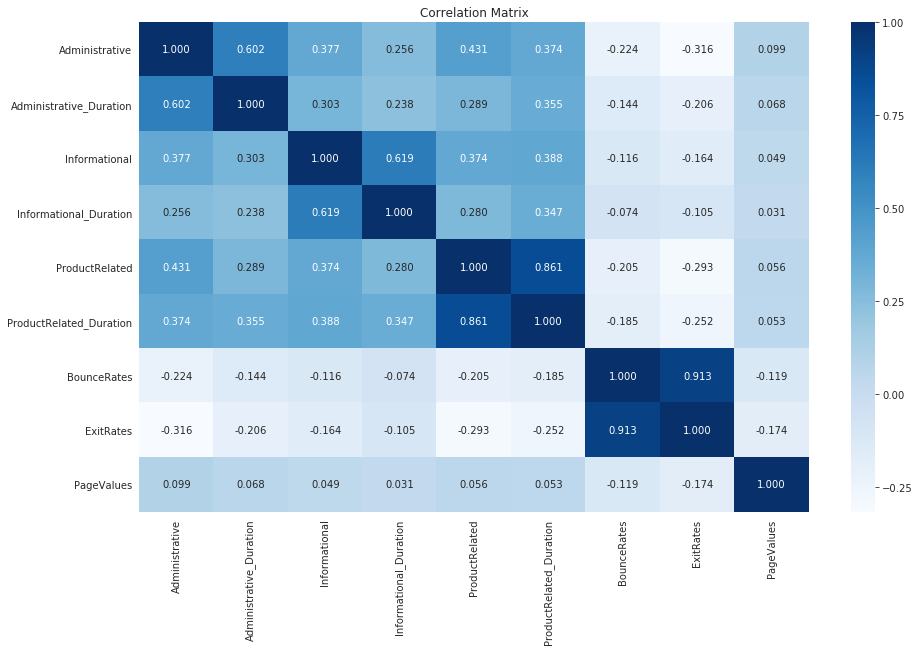

In [40]:
corr = data_cont.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

In [41]:
## do SpecialDay and SeasonBins have to be int64?

### __Save Final Dataframes as CSVs__

In [42]:
data_cont.to_csv('../project2-deadlinedemons/data_cont.csv', index=0)

In [43]:
data_cat.to_csv('../project2-deadlinedemons/data_cat.csv', index=0)

In [44]:
target_values.to_csv('../project2-deadlinedemons/target_values.csv', index=0)

In [45]:
data_cat_enc.to_csv('../project2-deadlinedemons/data_cat_enc.csv', index=0)